In [325]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from bokeh.io import output_notebook
from bokeh.plotting import figure, show, ColumnDataSource
from bokeh.models import FactorRange
from bokeh.palettes import HighContrast3
from bokeh.transform import dodge


In [326]:
df = pd.read_csv('../../philadelphia_restaurant_reviews.csv')
df_businesses = pd.read_json('../../yelp_academic_dataset_business.json', lines=True)
df_businesses = df_businesses[df_businesses['city'] == 'Philadelphia']


In [327]:
# Filter the businesses to only include restaurants
df_businesses = df_businesses[df_businesses['categories'].str.contains('Restaurants', na=False)]

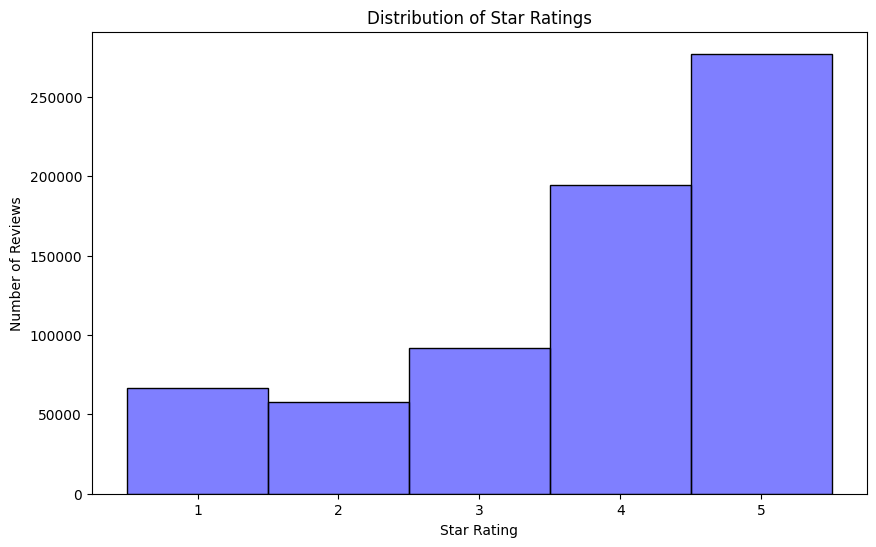

In [328]:
# Histogram of the number of reviews per star rating
plt.figure(figsize=(10, 6))
sns.histplot(df['stars'], bins=5, color='blue', alpha=0.5, label='Star Rating', discrete=True)
plt.xticks([1, 2, 3, 4, 5])  # Ensure ticks are at the center of each bar
plt.xlabel('Star Rating')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Star Ratings')
plt.show()



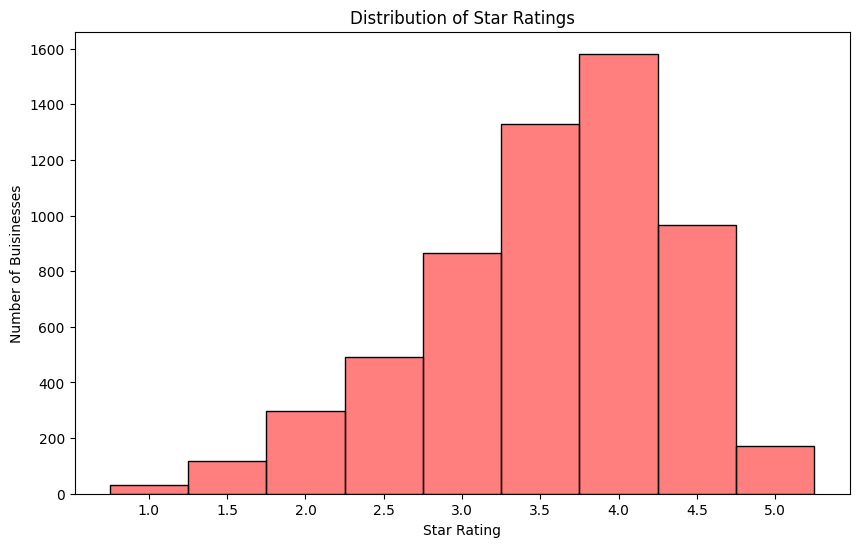

In [329]:
# Define bin edges centered around half-star steps (e.g., 1.0, 1.5, ..., 5.0)
bin_width = 0.5
min_star = df_businesses['stars'].min()
max_star = df_businesses['stars'].max()
bin_edges = np.arange(min_star - bin_width/2, max_star + bin_width, bin_width)

plt.figure(figsize=(10, 6))
sns.histplot(df_businesses['stars'], bins=bin_edges, color='red', alpha=0.5)

# Set xticks at each star rating level
plt.xticks(np.arange(1.0, 5.1, 0.5))  # Ticks from 1.0 to 5.0 by 0.5 steps
plt.xlabel('Star Rating')
plt.ylabel('Number of Buisinesses')
plt.title('Distribution of Star Ratings')
plt.show()

In [331]:
# split the categories into separate columns
df_businesses['categories'] = df_businesses['categories'].str.split(',')
df_businesses = df_businesses.explode('categories')
df_businesses['categories'] = df_businesses['categories'].str.strip()
# remove categories that appears less than 100 times
category_counts = df_businesses['categories'].value_counts()
categories_to_remove = category_counts[(category_counts < 200)].index
df_businesses = df_businesses[~df_businesses['categories'].isin(categories_to_remove)]
# # remove 'restaurants' from the categories
df_businesses = df_businesses[~df_businesses['categories'].str.contains('Restaurants', na=False)]
df_businesses = df_businesses[~df_businesses['categories'].str.contains('Food', na=False)]
# select the top 25 categories
top_categories = df_businesses['categories'].value_counts().nlargest(25).index
# filter the dataframe to only include the top 10 categories
df_businesses = df_businesses[df_businesses['categories'].isin(top_categories)]

In [332]:
df_group = df_businesses.groupby(['categories', 'stars']).size().reset_index(name='counts')
category_counts = df_businesses.value_counts('categories')
for index, row in df_group.iterrows():
    category = row['categories']
    df_group.at[index, 'normalized_counts'] = row['counts']/category_counts[category]
df_group = df_group.pivot(index='stars', columns='categories', values='normalized_counts')
df_group

categories,American (New),American (Traditional),Asian Fusion,Bakeries,Bars,Breakfast & Brunch,Burgers,Cafes,Caterers,Chicken Wings,...,Event Planning & Services,Italian,Japanese,Mexican,Nightlife,Pizza,Salad,Sandwiches,Seafood,Vegetarian
stars,,,,,,,,,,,,,,,,,,,,,
1.0,NaN,NaN,NaN,0.004202,0.001020,NaN,0.035813,NaN,NaN,0.012500,...,NaN,NaN,NaN,0.009524,0.001931,0.00500,NaN,0.001076,0.005571,NaN
1.5,0.001332,0.018100,0.008734,0.004202,0.005102,0.002915,0.121212,0.003096,0.009852,0.091667,...,0.009804,0.015842,0.008439,0.019048,0.005792,0.04125,NaN,0.013994,0.002786,0.004878
2.0,0.038615,0.061840,0.013100,0.021008,0.024490,0.036443,0.146006,0.037152,0.049261,0.183333,...,0.042484,0.039604,0.012658,0.028571,0.026062,0.09250,0.032143,0.045210,0.036212,0.004878
2.5,0.074567,0.131222,0.061135,0.063025,0.067347,0.052478,0.118457,0.043344,0.054187,0.116667,...,0.078431,0.069307,0.042194,0.079365,0.066602,0.13875,0.107143,0.097955,0.086351,0.048780
3.0,0.154461,0.162896,0.117904,0.096639,0.158163,0.142857,0.132231,0.111455,0.152709,0.216667,...,0.150327,0.156436,0.101266,0.168254,0.161197,0.19750,0.142857,0.168999,0.150418,0.087805
3.5,0.262317,0.230769,0.310044,0.176471,0.311224,0.209913,0.159780,0.136223,0.226601,0.116667,...,0.251634,0.225743,0.312236,0.187302,0.308880,0.20875,0.225000,0.188375,0.306407,0.209756
4.0,0.311585,0.292609,0.275109,0.281513,0.315306,0.327988,0.187328,0.281734,0.241379,0.154167,...,0.248366,0.283168,0.282700,0.263492,0.308880,0.20000,0.285714,0.266954,0.284123,0.326829
4.5,0.146471,0.085973,0.205240,0.315126,0.107143,0.209913,0.088154,0.321981,0.182266,0.091667,...,0.150327,0.180198,0.215190,0.190476,0.111004,0.10250,0.178571,0.179763,0.108635,0.282927
5.0,0.010652,0.016591,0.008734,0.037815,0.010204,0.017493,0.011019,0.065015,0.083744,0.016667,...,0.068627,0.029703,0.025316,0.053968,0.009653,0.01375,0.028571,0.037675,0.019499,0.034146


In [333]:
source = ColumnDataSource(df_group)

# stars to string
stars = [str(star) for star in np.sort(df_businesses['stars'].unique())]
p = figure(x_axis_label = 'Stars', y_axis_label = 'Normalized Count', width=800, height=700)


bar ={} # to store vbars
categories = df_group.columns.tolist()

HighContrast27 = [
    "#1f77b4",  # Blue  
    "#ff7f0e",  # Orange  
    "#2ca02c",  # Green  
    "#d62728",  # Red  
    "#9467bd",  # Purple  
    "#8c564b",  # Brown  
    "#e377c2",  # Pink  
    "#7f7f7f",  # Gray  
    "#bcbd22",  # Olive  
    "#17becf",  # Teal  
    "#393b79",  # Dark Blue
    "#637939",  # Army Green
    "#8c6d31",  # Dark Tan
    "#843c39",  # Burgundy
    "#7b4173",  # Plum
    "#3182bd",  # Sky Blue
    "#f33e52",  # Bright Red
    "#31a354",  # Emerald Green
    "#756bb1",  # Violet
    "#636363",  # Charcoal Gray
    "#fdae6b",  # Light Orange
    "#a55194",  # Magenta
    "#9ecae1",  # Light Blue
    "#e7ba52",  # Mustard
    "#c7c7c7",  # Light Gray
    "#6baed6",  # Soft Blue
    "#fd8d3c",  # Orange Coral
]

for indx,i in enumerate(categories):
    bar[i] = p.vbar(x='stars',  top=i, source= source, 
                    ### we will create a vbar for each focuscrime
                    legend_label=i,  muted_alpha=0, alpha = 0.7, width = 0.5, color=HighContrast27[indx], muted = True) 
    
# p.vbar_stack(focuscrimes, x='TimeOfDay', width=0.9, color=HighContrast10, source=source,
#              legend_label=focuscrimes)
# place legend outside the plot area
p.add_layout(p.legend[0], 'left')

In [334]:
p.legend.click_policy="mute"
output_notebook()
show(p) 

Loading BokehJS ...

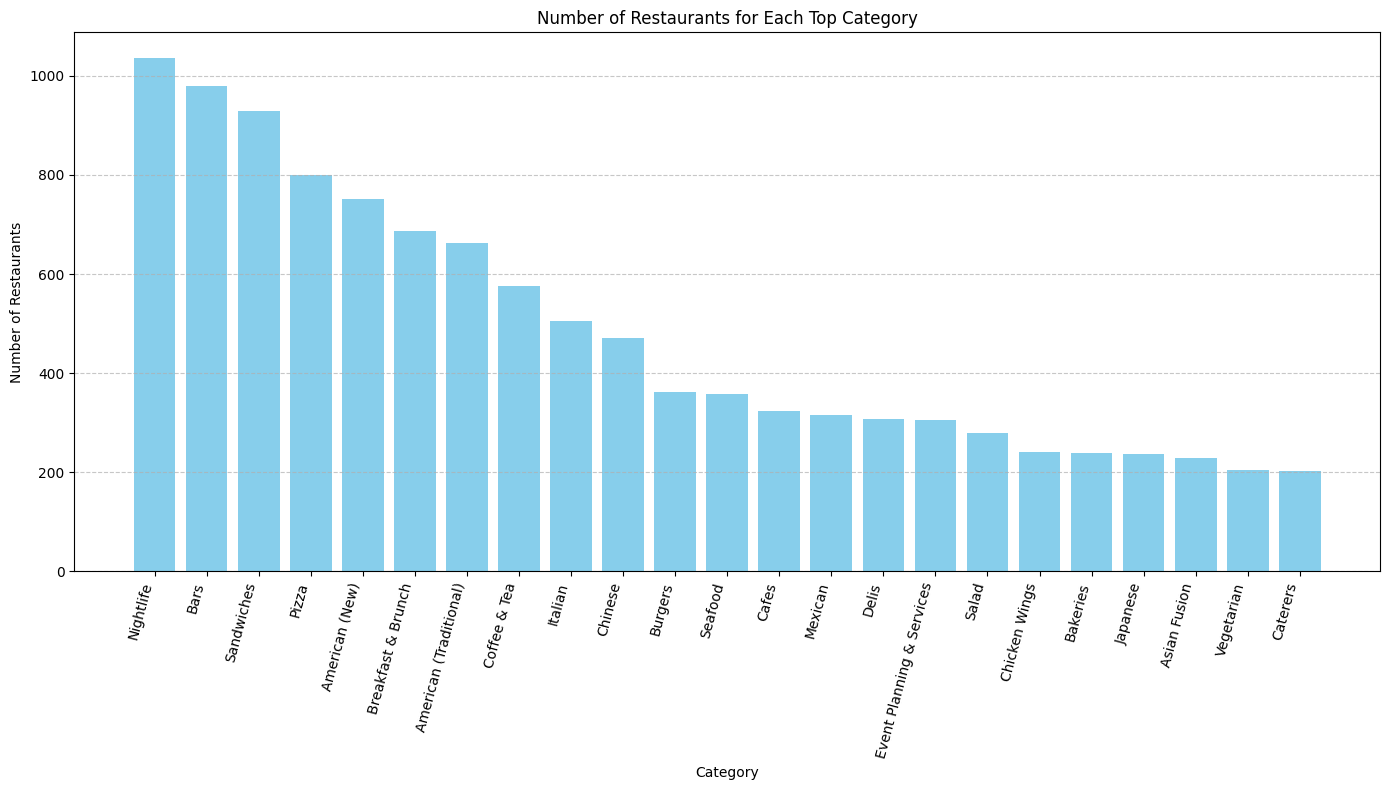

In [ ]:
plt.figure(figsize=(14, 8))
plt.bar(category_counts.index, category_counts.values, color='skyblue')
plt.xticks(rotation=75, ha='right')
plt.xlabel("Category")
plt.ylabel("Number of Restaurants")
plt.title("Number of Restaurants for Each Top Category")
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

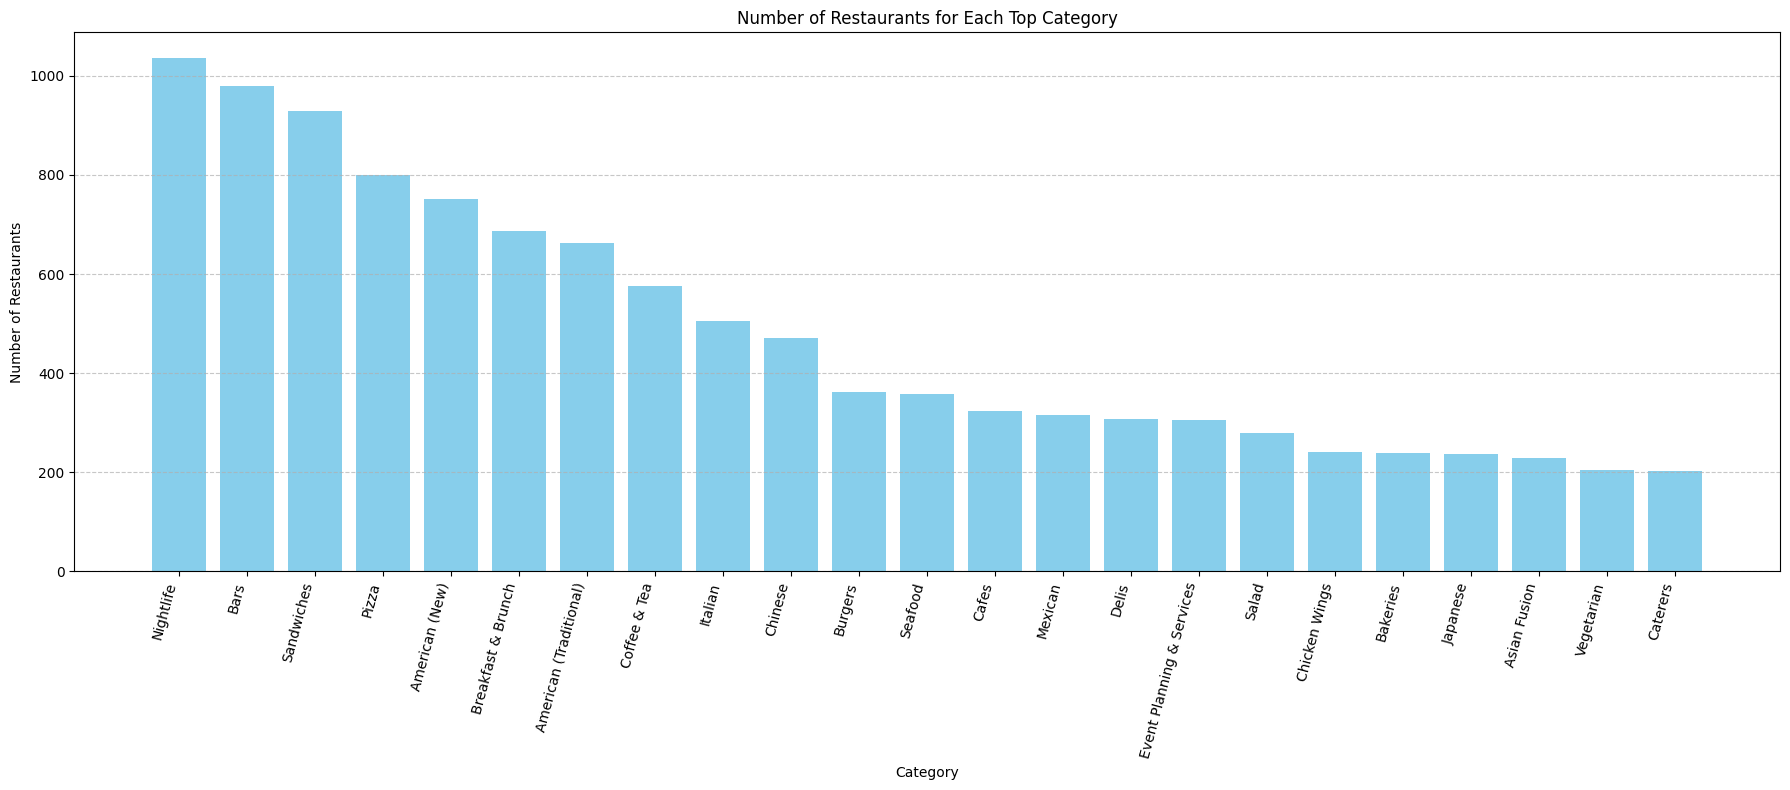

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...",Coffee & Tea,"{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...",Bakeries,"{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
15,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,PA,19106,39.953949,-75.143226,4.0,245,1,"{'RestaurantsReservations': 'True', 'Restauran...",Japanese,"{'Tuesday': '13:30-22:0', 'Wednesday': '13:30-..."
28,QdN72BWoyFypdGJhhI5r7g,Bar One,767 S 9th St,Philadelphia,PA,19147,39.939825,-75.157447,4.0,65,0,"{'Smoking': 'u'no'', 'NoiseLevel': 'u'average'...",Bars,"{'Monday': '16:0-0:0', 'Tuesday': '16:0-0:0', ..."
28,QdN72BWoyFypdGJhhI5r7g,Bar One,767 S 9th St,Philadelphia,PA,19147,39.939825,-75.157447,4.0,65,0,"{'Smoking': 'u'no'', 'NoiseLevel': 'u'average'...",Italian,"{'Monday': '16:0-0:0', 'Tuesday': '16:0-0:0', ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150306,wVxXRFf10zTTAs11nr4xeA,PrimoHoagies,6024 Ridge Ave,Philadelphia,PA,19128,40.032483,-75.214430,3.0,55,1,"{'NoiseLevel': 'u'average'', 'RestaurantsTakeO...",Italian,"{'Monday': '10:0-21:0', 'Tuesday': '10:0-21:0'..."
150319,8n93L-ilMAsvwUatarykSg,Kitchen Gia,3716 Spruce St,Philadelphia,PA,19104,39.951018,-75.198240,3.0,22,0,"{'RestaurantsGoodForGroups': 'True', 'BikePark...",Coffee & Tea,"{'Monday': '9:0-19:30', 'Tuesday': '9:0-19:30'..."
150319,8n93L-ilMAsvwUatarykSg,Kitchen Gia,3716 Spruce St,Philadelphia,PA,19104,39.951018,-75.198240,3.0,22,0,"{'RestaurantsGoodForGroups': 'True', 'BikePark...",Sandwiches,"{'Monday': '9:0-19:30', 'Tuesday': '9:0-19:30'..."
150319,8n93L-ilMAsvwUatarykSg,Kitchen Gia,3716 Spruce St,Philadelphia,PA,19104,39.951018,-75.198240,3.0,22,0,"{'RestaurantsGoodForGroups': 'True', 'BikePark...",American (Traditional),"{'Monday': '9:0-19:30', 'Tuesday': '9:0-19:30'..."


In [355]:
category_counts = df_businesses['categories'].value_counts()
plt.figure(figsize=(18, 8))
plt.bar(category_counts.index, category_counts.values, color='skyblue')
plt.xticks(rotation=75, ha='right')
plt.xlabel("Category")
plt.ylabel("Number of Restaurants")
plt.title("Number of Restaurants for Each Top Category")
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
df_businesses